In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [72]:
df = pd.read_csv('HousePricePrediction.xlsx - Sheet1.csv')
df

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [73]:
df.shape

(2919, 13)

In [74]:
df.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
LotConfig        object
BldgType         object
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
Exterior1st      object
BsmtFinSF2      float64
TotalBsmtSF     float64
SalePrice       float64
dtype: object

In [75]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [76]:
df.nunique()

Id              2919
MSSubClass        16
MSZoning           5
LotArea         1951
LotConfig          5
BldgType           5
OverallCond        9
YearBuilt        118
YearRemodAdd      61
Exterior1st       15
BsmtFinSF2       272
TotalBsmtSF     1058
SalePrice        663
dtype: int64

In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1459.000000,842.787043,0.0,729.5,1459.0,2188.5,2918.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
BsmtFinSF2,2918.0,49.582248,169.205611,0.0,0.0,0.0,0.0,1526.0
TotalBsmtSF,2918.0,1051.777587,440.766258,0.0,793.0,989.5,1302.0,6110.0
SalePrice,1460.0,180921.195890,79442.502883,34900.0,129975.0,163000.0,214000.0,755000.0


In [78]:
df['MSSubClass'].value_counts()

20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [79]:
df['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [80]:
df['LotConfig'].value_counts()

Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64

In [81]:
df['BldgType'].value_counts()

1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64

In [82]:
df['Exterior1st'].value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

In [83]:
df['YearBuilt'].value_counts()

2005    142
2006    138
2007    109
2004     99
2003     88
       ... 
1896      1
1902      1
1913      1
1879      1
1904      1
Name: YearBuilt, Length: 118, dtype: int64

In [84]:
df['BsmtFinSF2'].value_counts()

0.0       2571
180.0        5
294.0        5
435.0        3
483.0        3
          ... 
600.0        1
211.0        1
1031.0       1
438.0        1
297.0        1
Name: BsmtFinSF2, Length: 272, dtype: int64

In [85]:
df['SalePrice'].value_counts()

140000.0    20
135000.0    17
155000.0    14
145000.0    14
190000.0    13
            ..
202665.0     1
164900.0     1
208300.0     1
181500.0     1
147500.0     1
Name: SalePrice, Length: 663, dtype: int64

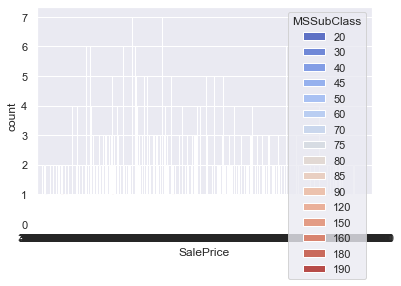

In [86]:
sns.set()
sns.countplot(df['SalePrice'],palette = 'coolwarm',hue = 'MSSubClass',data=df);

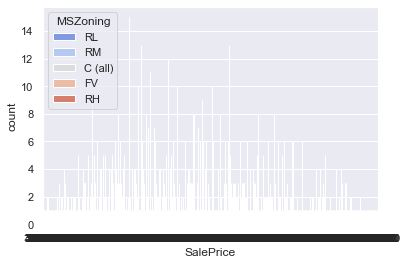

In [87]:
sns.countplot(df['SalePrice'],palette = 'coolwarm',hue = 'MSZoning',data=df);

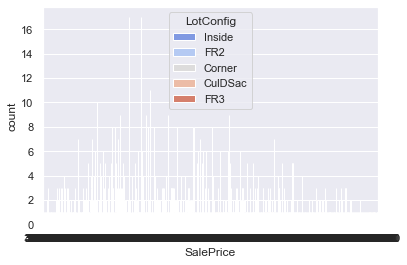

In [88]:
sns.countplot(df['SalePrice'],palette = 'coolwarm',hue = 'LotConfig',data=df);

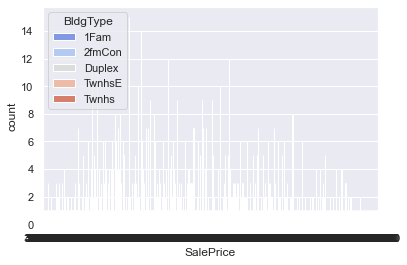

In [89]:
sns.countplot(df['SalePrice'],palette = 'coolwarm',hue = 'BldgType',data=df);

In [90]:
df.corr()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
Id,1.000000,0.008931,-0.040746,-0.002839,-0.016581,-0.050438,0.018251,-0.024924,-0.021917
MSSubClass,0.008931,1.000000,-0.201730,-0.065625,0.034409,0.043315,-0.072530,-0.219965,-0.084284
LotArea,-0.040746,-0.201730,1.000000,-0.035617,0.024128,0.021612,0.084059,0.254138,0.263843
OverallCond,-0.002839,-0.065625,-0.035617,1.000000,-0.368477,0.047654,0.041501,-0.174002,-0.077856
YearBuilt,-0.016581,0.034409,0.024128,-0.368477,1.000000,0.612235,-0.027595,0.408515,0.522897
YearRemodAdd,-0.050438,0.043315,0.021612,0.047654,0.612235,1.000000,-0.062153,0.298107,0.507101
BsmtFinSF2,0.018251,-0.072530,0.084059,0.041501,-0.027595,-0.062153,1.000000,0.089410,-0.011378
TotalBsmtSF,-0.024924,-0.219965,0.254138,-0.174002,0.408515,0.298107,0.089410,1.000000,0.613581
SalePrice,-0.021917,-0.084284,0.263843,-0.077856,0.522897,0.507101,-0.011378,0.613581,1.000000


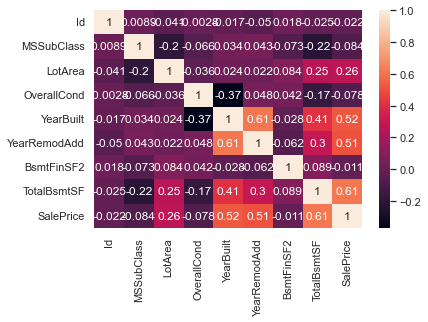

In [91]:
sns.heatmap(df.corr(), annot=True);

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotArea'}>],
       [<AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>],
       [<AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

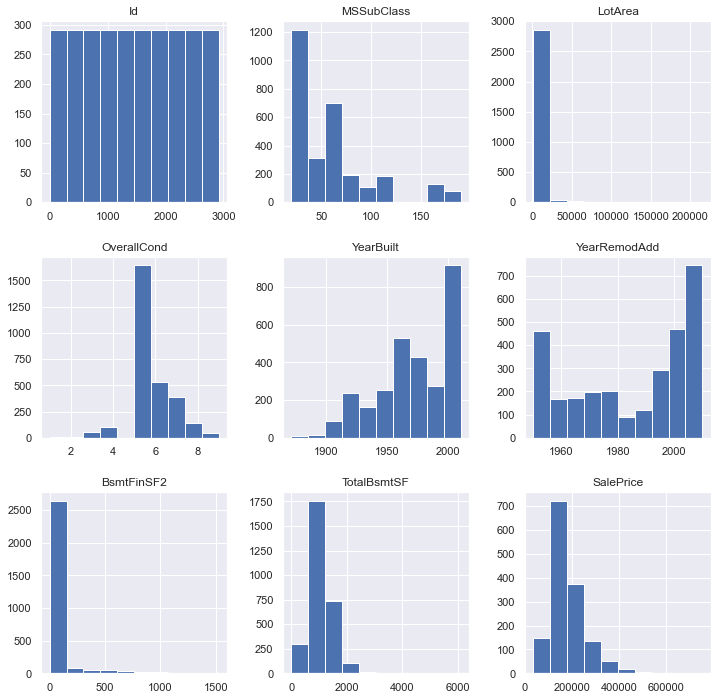

In [92]:
sns.set()
df.hist(figsize=(12,12), layout=(3,3), sharex=False)

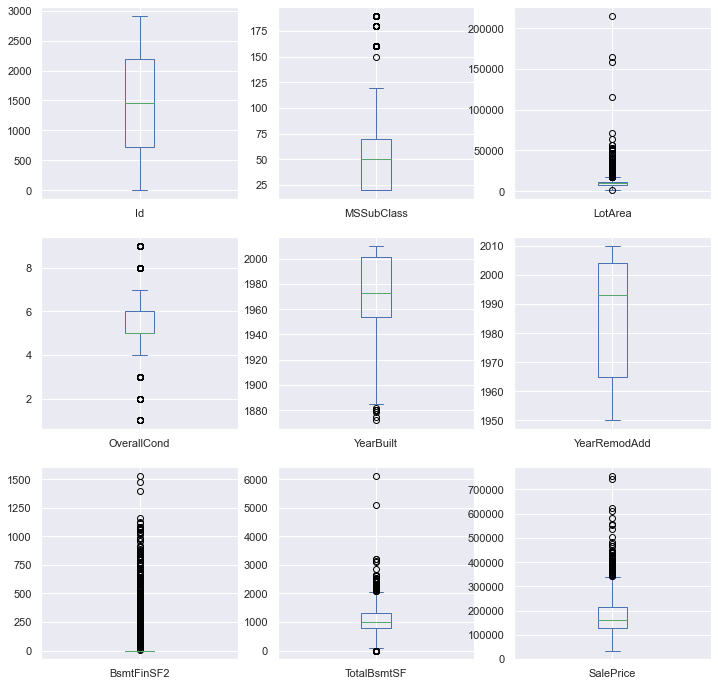

In [93]:
df.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True);

In [94]:
x = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

In [95]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [96]:
df1= df.copy()
df1= df1.apply(LabelEncoder().fit_transform)
df1.head(10)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,5,3,619,4,0,4,110,53,12,0,261,412
1,1,0,3,895,2,0,7,83,26,8,0,603,339
2,2,5,3,1266,4,0,4,108,52,12,0,307,442
3,3,6,3,883,0,0,4,25,20,13,0,181,194
4,4,5,3,1670,2,0,4,107,50,12,0,504,494
5,5,4,3,1650,4,0,4,100,45,12,0,209,203
6,6,0,3,1002,4,0,4,111,55,12,0,898,573
7,7,5,3,1074,0,0,5,80,23,6,4,474,390
8,8,4,4,251,4,0,4,41,0,3,0,334,151
9,9,15,3,405,0,1,5,48,0,8,0,369,113


In [97]:
df1.isnull().sum()

Id              0
MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [98]:
df1.dtypes

Id              int64
MSSubClass      int64
MSZoning        int32
LotArea         int64
LotConfig       int32
BldgType        int32
OverallCond     int64
YearBuilt       int64
YearRemodAdd    int64
Exterior1st     int32
BsmtFinSF2      int64
TotalBsmtSF     int64
SalePrice       int64
dtype: object

In [103]:
ss= StandardScaler().fit(df1.drop('SalePrice',axis=1))

In [104]:
x = ss.transform(df1.drop('SalePrice', axis=1))
y = df1['SalePrice']

In [105]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=30)

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

model = lr.fit(x_train, y_train)
prediction = model.predict(x_test)

print('accuracy on training data: {:,.2f}'.format(lr.score(x_train, y_train)))
print("Accuracy on test data: {:,.2f}".format(lr.score(x_test, y_test)))

accuracy on training data: 0.58
Accuracy on test data: 0.51


In [107]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [109]:
print(confusion_matrix(y_test,prediction))

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0 448]]


In [111]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0
          25       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         3
          31       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         1
          34       0.00    